In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# distinction between the two data sets. this is useful if we think there is a distinction between the final grades based on the subject.
# if this assumption is made, we then need to make sure that the two subjects are balanced + train / test sets contain proportional samples 
# for each subject. 
# dataset_mat = pd.read_csv('data/student-mat.csv', delimiter = ';')
# dataset_por = pd.read_csv('data/student-por.csv', delimiter = ';')

# dataset_mat['mat'] = 'Mat'
# dataset_por['mat'] = 'Por'

# dataset_united = pd.concat([dataset_mat, dataset_por], 0)

# dataset_united.info()
# for i in dataset_united.columns:
#     print(dataset_united[i].unique())
# print(dataset_united.absences.max())
# dataset_united.absences = dataset_united.absences.apply(lambda x: )
# new_dataset_united = pd.get_dummies(dataset_united, prefix_sep='_', drop_first=True)
# print(new_dataset_united)

In [3]:
data = pd.read_csv('data.csv')
#data.info()

In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = []
# for column in data.columns:
#     if data[column].dtype == object:
#         categorical_columns.append(column)
for column in data.columns:
    if data[column].dtype == object:
        data[column] = label_encoder.fit_transform(data[column])
#data.info()


In [6]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [7]:
g3_threshold = 15
data[data['G3'] < g3_threshold] = 0 # fail
data[data['G3'] >= g3_threshold] = 1 # pass 
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# set model metric - accuracy (how many examples can I predict?)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data[data.columns[:-1]]
y = data['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)


In [9]:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Train accuracy score: %s" % train_score)
print("Test accuracy score: %s" % test_score)

Train accuracy score: 1.0
Test accuracy score: 1.0


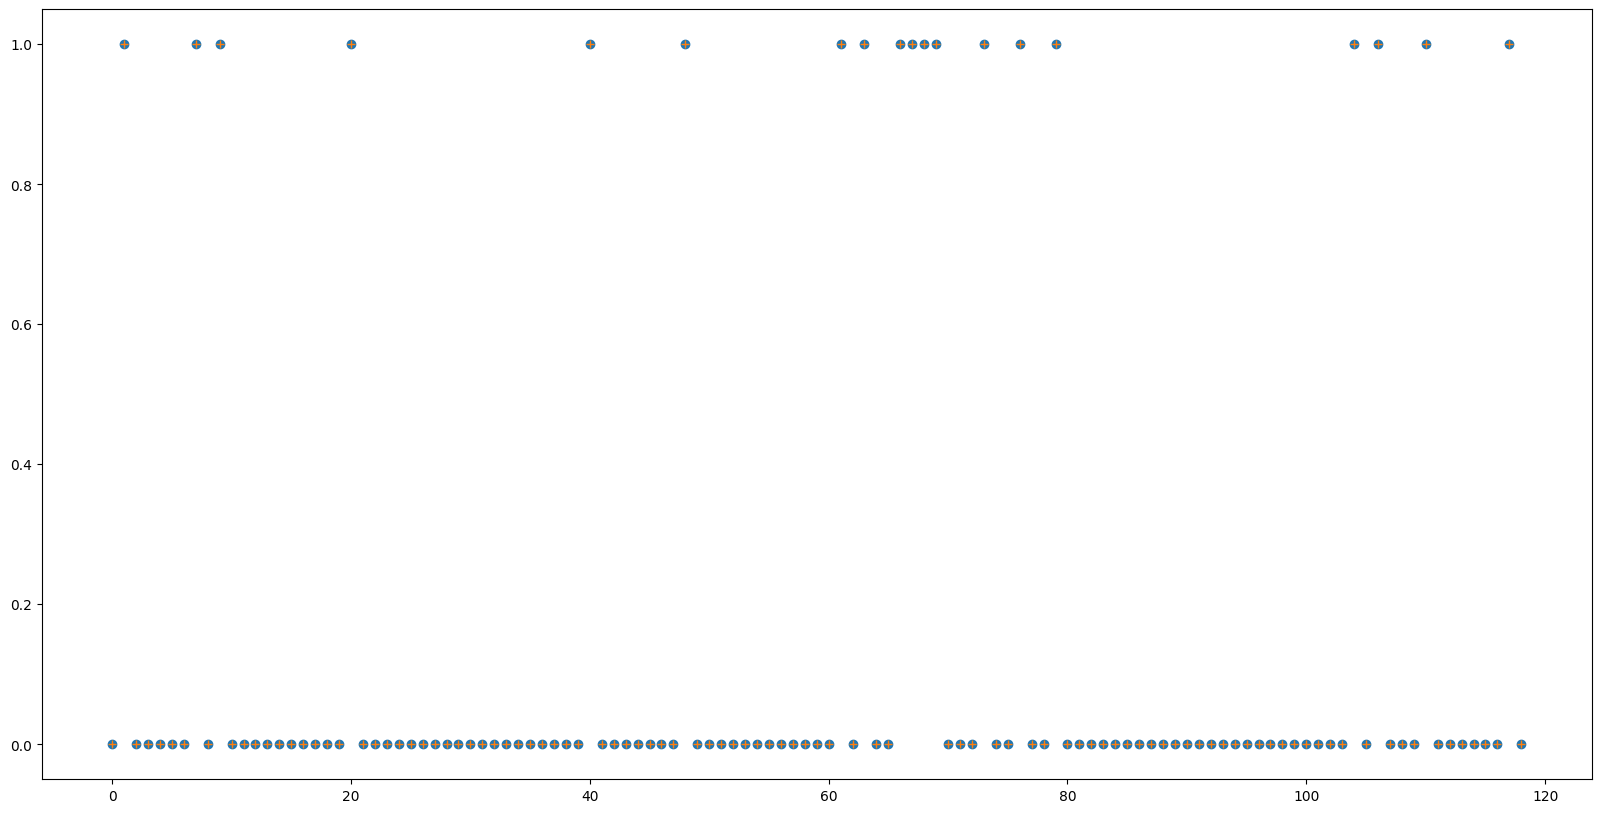

In [10]:
fig = plt.figure(figsize=(20, 10))
plt.plot(range(len(y_test)), y_test, 'o')
plt.plot(range(len(y_test)), y_pred, '+')
plt.show()

In [71]:
# Linear regression
from sklearn.linear_model import LinearRegression
X = data[data.columns[:-1]]
y = data['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
reg = LinearRegression()
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Train accuracy score: %s" % train_score)
print("Accuracy score: %s" % test_score)

Train accuracy score: 0.0
Accuracy score: 0.0


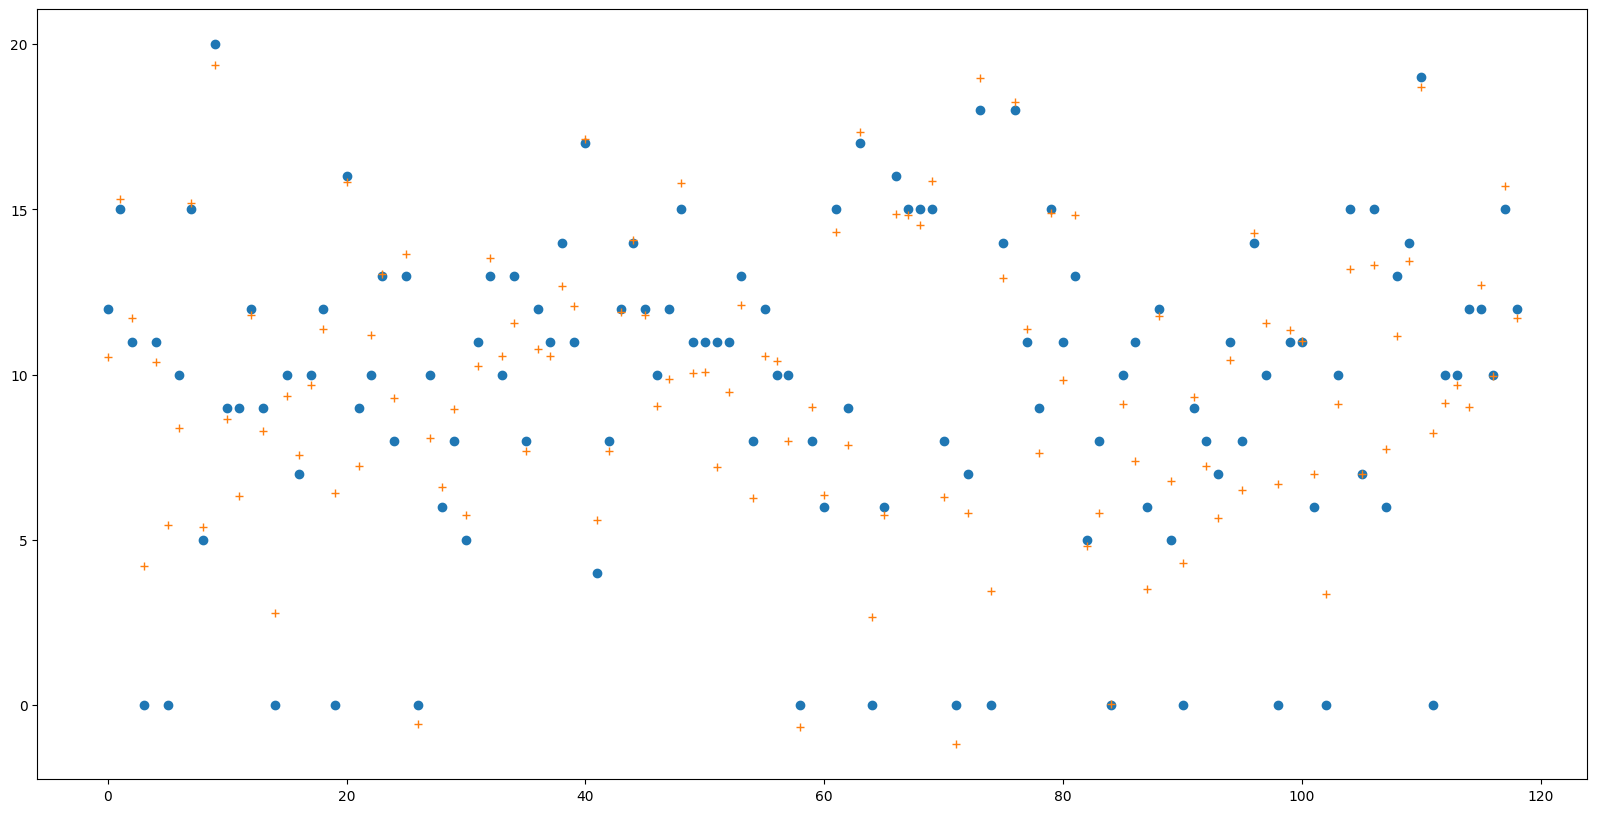

In [70]:
fig = plt.figure(figsize=(20, 10))
plt.plot(range(len(y_test)), y_test, 'o')
plt.plot(range(len(y_test)), y_pred, '+')
plt.show()